# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import all libraries
import pandas as pd
import requests
import json
import numpy as np

In [2]:
#read the twitter-archive-enhanced data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding ='utf-8')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#read the image prediction from the url using response.get
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#check response gotten
response

<Response [200]>

In [5]:
#read the content from response
with open(url.split('/')[-1], mode ='wb') as file:
    file.write(response.content)

In [6]:
# load the file to a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#read json file and append to list
#create empty list
df_tweet = []
#open the json file and read into lines
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        #appened the read files to the empty list
        df_tweet.append({'tweet_id': tweet_id,
                        'favourites': favorite_count,
                        'retweets': retweet_count})
                 
# Create DataFrame       
tweet_data = pd.DataFrame(df_tweet, columns = ['tweet_id', 'retweets', 'favourites'])
tweet_data

,tweet_id,retweets,favourites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [8]:
#check .info()
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id      2354 non-null int64
retweets      2354 non-null int64
favourites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assess twitter_archive

In [9]:
# check the head() of twitter_archive
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [10]:
# assess the twitter_archive data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# check the twitter_archive describe()
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# check for duplicates
twitter_archive.duplicated().sum()

0

In [13]:
#check for null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
#check the value_counts of doggo
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
#check the value_counts of floofer
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
#check the value_counts of pupper
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
#check the value_counts of puppo
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
# check the value counts
twitter_archive['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Lola            10
Penny           10
Tucker          10
Bo               9
Winston          9
Sadie            8
the              8
Toby             7
an               7
Bailey           7
Buddy            7
Daisy            7
Dave             6
Rusty            6
Jax              6
Leo              6
Stanley          6
Oscar            6
Koda             6
Milo             6
Bella            6
Jack             6
Scout            6
Finn             5
              ... 
Alf              1
Ron              1
Lugan            1
Lupe             1
Oddie            1
Ike              1
Teddy            1
Dotsy            1
Tess             1
Odin             1
Huck             1
Craig            1
Farfle           1
Gordon           1
Shakespeare      1
Binky            1
Striker          1
Aldrick          1
Trevith          1
Rascal           1
Jarvis           1
Todo        

In [19]:
#check random sample
twitter_archive.name.sample(5)

183      Callie
316      Tucker
14       Stuart
1651    Griffin
2212        the
Name: name, dtype: object

### Assess image_predictions

In [20]:
#view the image_prediction
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
#check info of the image_prediction
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#find out the number of missing rows
len(twitter_archive)-len(image_predictions)

281

In [23]:
#check for duplicates in image_predictions
image_predictions.duplicated().sum()

0

In [24]:
#find the sum of duplicates
image_predictions.jpg_url.duplicated().sum()

66

In [25]:
# check the .describe() of the image_predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
#check for null values in the image_predictions
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
#check p1 value_counts
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
teddy                         18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [28]:
#check p2 value_counts
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
toy_terrier                        20
chow                               20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [29]:
#check p3 value_counts
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [30]:
#subset the p1_dog
image_predictions[image_predictions.p1_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


### Assess tweet_data

In [31]:
# check head of the tweet_data
tweet_data.head()

,tweet_id,retweets,favourites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [32]:
# check info of the tweet_data
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id      2354 non-null int64
retweets      2354 non-null int64
favourites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [33]:
#compare the missing values between the twitter_archive and tweet_data dataset
len(twitter_archive)-len(tweet_data)

2

In [34]:
# assess the .describe of the tweet_data
tweet_data.describe()

,tweet_id,retweets,favourites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [35]:
#check for null values in tweet_data
tweet_data.isna().sum()

tweet_id      0
retweets      0
favourites    0
dtype: int64

In [36]:
#check for duplicates in tweet_data
tweet_data.duplicated().sum()

0

## List the Issues

### Quality issues
1. The tweet_id has dtype 'int64' in all datasets

2. There are so many NaN values in the 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' columns

3. The timestamp is dtype 'object'

4. There are duplicates in the 'jpg_url' column

5. Names have invalid entries such as 'None', 'a','an' etc

6. There's date and time in the timestamp column. It can be separated into their individual columns

7. The source has url. Extract the source to have the strings and not the url

8. P1, P2, P3 have underscores(_) in their str instead of spaces

### Tidiness issues
1. Some dogs are doggo, floofer, puppo, pupper in the twitter_archive data. These are unnecesary columns

2. All the data set have some columns in common

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data
archive = twitter_archive.copy()
image = image_predictions.copy()
tweet = tweet_data.copy()

## Issue #1: Tidy issues data cleaning

#### Define: 
All the data set have some columns in common. To solve this, it's best to merge archive and image first, then left merge the tweet data all on their tweet_ids to have a master dataset for cleaning

#### Code
Merge the datasets

In [38]:
#merge the multiple dataframe into one single datafram
all_twitter = pd.merge(archive, image, on='tweet_id') \
                        .merge(tweet, on='tweet_id', how='left')

#### Test

In [39]:
#check the .info()
all_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [40]:
# make a copy of the merged dataset for cleaning
twitter = all_twitter.copy()

In [41]:
#check the .info of the copied dataset
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

### Define: 
Some dogs are doggo, floofer, puppo, pupper in the twitter_archive data. These are unnecesary columns.
First, we make a copy of the all_twitter data and call it twitter
Then we melt the unnecessary columns

#### Code
Make a copy of the all_twitter dataset

#### Code
Melt the unnecessary columns into one column

In [42]:
#check columns
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets', 'favourites'],
      dtype='object')

In [43]:
#melt the dataset into the twitter datafram
twitter = pd.melt(twitter, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets', 'favourites'],
                  var_name = 'stages', value_name='dog_stages')

In [44]:
#drop stages
twitter = twitter.drop('stages', axis=1)
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favourites,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.07611,False,8853.0,39467.0,None


In [45]:
# sort by dog_stage then drop duplicated based on tweet_id except the last occurrence
twitter = twitter.sort_values('dog_stages').drop_duplicates(subset='tweet_id', keep='last')
twitter.dog_stages.value_counts()

None       1754
pupper      222
doggo        67
puppo        24
floofer       8
Name: dog_stages, dtype: int64

In [46]:
# replace 'None' with NaNs
twitter['dog_stages'].replace('None', np.nan, inplace = True)
twitter.dog_stages.value_counts()

pupper     222
doggo       67
puppo       24
floofer      8
Name: dog_stages, dtype: int64

In [47]:
# change dtype to categorical
twitter['dog_stages'] = twitter['dog_stages'].astype("category")
twitter.dog_stages.dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

#### Test

In [48]:
#check info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 1997 to 6980
Data columns (total 27 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        20

## Issue #2: Quality Issues data cleaning

#### Define
The tweet_id in the merged general dataset has dtype 'int64'.

To clean this, I will convert the dtypes forn integers to strings.

#### Code
- Find tweet_id dtypes
- use the astype attribute

In [49]:
#check the dtypes of the tweet_id
twitter.tweet_id.dtypes

dtype('int64')

In [50]:
# convert to string
twitter.tweet_id = twitter['tweet_id'].astype('str')

#### Test

In [51]:
#check the dtypes
twitter.tweet_id.dtypes

dtype('O')

#### Define
There are so many NaN values in the 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' columns.

To clean this, I will drop this columns

#### Code
drop the above columns

In [52]:
#creat a list Col of columns to be dropped
col=['in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',]

In [53]:
#drop the column using the list created
twitter = twitter.drop(col, axis=1)

#### Test

In [54]:
#check the info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 1997 to 6980
Data columns (total 22 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null object
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
retweets              2073 non-null float64
favourites            2073 non-null

#### Define
The timestamp is dtype 'object'
To clean this, I will convert the dtypes forn objects to datetimes.

#### Code
- Find timestamp dtypes
- use the to_datetime attribute

In [55]:
# check the dtype
twitter.timestamp.dtypes

dtype('O')

In [56]:
# convert to datetime
twitter.timestamp = pd.to_datetime(twitter.timestamp)

#### Test

In [57]:
#check the dtypes
twitter.timestamp.dtypes

dtype('<M8[ns]')

#### Define
There are duplicated values in the 'Jpg_url'

To clean this, I will drop duplicates

#### Code
- Find how many duplicates are in the 'jpg_url' column
- drop duplicates

In [58]:
# find the sum of the duplicates
twitter['jpg_url'].duplicated().sum()

66

In [59]:
#drop the duplicates
twitter.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

#### Test

In [60]:
# check the sum of the duplicates
twitter['jpg_url'].duplicated().sum()

0

#### Define
The names column have invalid entries such as 'None', 'a','an', and some starting with lower case
- To clean this, I will find the names starting with lowercase and then write a for loop
- I will then replace the name starting with lowercase and none with NaN values

#### Code
- Find names starting with lower case
- Replace with NaN

In [61]:
# find the names starting with lower case
twitter[twitter.name.str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favourites,dog_stages
1993,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,...,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,102.0,273.0,NaN
1984,667538891197542400,2015-11-20 03:04:08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,...,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True,72.0,220.0,NaN
1975,667773195014021121,2015-11-20 18:35:10,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,https://twitter.com/dog_rates/status/667773195...,8,10,a,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,...,True,pug,0.093494,True,ice_bear,0.069038,False,61.0,243.0,NaN
2030,666781792255496192,2015-11-18 00:55:42,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,https://twitter.com/dog_rates/status/666781792...,10,10,a,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,...,True,Weimaraner,0.151363,True,vizsla,0.085989,True,211.0,404.0,NaN
2023,666983947667116034,2015-11-18 14:18:59,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,https://twitter.com/dog_rates/status/666983947...,11,10,a,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,...,False,chain_saw,0.190142,False,wig,0.034510,False,1040.0,2679.0,NaN
2007,667177989038297088,2015-11-19 03:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8,10,a,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,...,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True,58.0,200.0,NaN
1969,667861340749471744,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,https://twitter.com/dog_rates/status/667861340...,9,10,a,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,...,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True,86.0,253.0,NaN
1955,668171859951755264,2015-11-21 20:59:20,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,https://twitter.com/dog_rates/status/668171859...,7,10,a,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,...,True,cowboy_boot,0.060343,False,giant_panda,0.059838,False,208.0,525.0,NaN
2033,666701168228331520,2015-11-17 19:35:19,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,https://twitter.com/dog_rates/status/666701168...,8,10,a,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,...,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True,234.0,449.0,NaN
2054,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,...,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,71.0,152.0,NaN


In [62]:
# create a for loop to iterate and convert
lowercase = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase:
        lowercase.append(row)
print(lowercase)

['a', 'an', 'quite', 'the', 'such', 'getting', 'actually', 'infuriating', 'very', 'light', 'space', 'just', 'by', 'officially', 'incredibly', 'one', 'not', 'my', 'unacceptable', 'this', 'his', 'all']


In [63]:
#replace starting with lowercase with NaN
twitter['name'].replace(lowercase, np.nan, inplace = True)

In [64]:
#replace name starting with None with Nan
twitter['name'].replace('None', np.nan, inplace = True)

#### Test

In [65]:
# check the name count
twitter.name.count

<bound method Series.count of 1997          NaN
1996          NaN
1995      Cupcake
1994        Reese
1993          NaN
1992          NaN
1991     Philippe
1990         Hall
1988         Dook
1987          NaN
1986    Naphaniel
1985        Frank
1998          NaN
1984          NaN
1982       George
1981          NaN
1980          NaN
1979          NaN
1978          NaN
1977        Olive
1976       Calvin
1975          NaN
1974          NaN
1973          NaN
1972          NaN
1971        Filup
1970          NaN
1983         Kial
1999        Biden
2000         Fwed
          ...    
5694          NaN
4799       Willem
5405        Wally
4948          NaN
5409          NaN
5408          NaN
5268      Ambrose
6543        Pablo
7116       Bayley
7012       Cooper
6541          NaN
6380          NaN
7000          NaN
6239       Stuart
6685         Loki
6306    Sebastian
6555          NaN
6366          NaN
6674        Diogi
6780        Tonks
6575       Oliver
6818          NaN
7085         Kil

In [66]:
# check the sum of the null values
pd.isnull(twitter.name).sum()

659

In [67]:
# check the value_counts
twitter.name.value_counts()

Charlie        11
Lucy           10
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Winston         8
Toby            7
Daisy           7
Lola            7
Stanley         6
Bo              6
Jax             6
Bella           6
Koda            6
Oscar           5
Louis           5
Leo             5
Scout           5
Buddy           5
Bailey          5
Rusty           5
Dave            5
Chester         5
Milo            5
Jack            4
Duke            4
Maggie          4
Bear            4
               ..
Jarod           1
Ron             1
Fred            1
Lupe            1
Edgar           1
Sage            1
Severus         1
Tilly           1
Shakespeare     1
Jangle          1
Ralf            1
Dotsy           1
Odin            1
Sparky          1
Chelsea         1
Craig           1
Farfle          1
Gordon          1
Binky           1
William         1
Aldrick         1
Dido            1
Tess            1
Juckson         1
Jarvis    

#### Define
There's date and time in the timestamp column. It can be separated into their individual columns
- To clean this, I will separate into date and time column
- I will drop the timestamp column

#### Code
- Separate the date and time to their respective column

In [68]:
#read the timestamp column
twitter.timestamp.head(1)

1997   2015-11-19 20:20:22
Name: timestamp, dtype: datetime64[ns]

In [69]:
#create the date column by splitting the timestamp
twitter['date'] = twitter.timestamp.dt.date

In [70]:
#create the time column by splitting the timestamp
twitter['time'] = twitter.timestamp.dt.time

In [71]:
#drop the timestamp column
twitter = twitter.drop('timestamp', axis=1)

#### Test

In [72]:
# check the twitter data
twitter.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favourites,dog_stages,date,time
1997,667437278097252352,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,NaN,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,...,0.0063,False,badger,0.000966,False,257.0,483.0,NaN,2015-11-19,20:20:22


In [73]:
# check the info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 1997 to 6980
Data columns (total 23 columns):
tweet_id              2009 non-null object
source                2009 non-null object
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  1350 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null bool
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null bool
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null bool
retweets              2007 non-null float64
favourites            2007 non-null float64
dog_stages            310 non-null

#### Define
Extract the source to have the strings and not the url
- To clean this, I will extract the string to give just the source

#### Code
- Find value count of source column
- Use str.contains
- change the dtypes to category

In [74]:
# chek the value counts of the source column
twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1970
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [75]:
# check the dtypes
twitter.source.dtypes

dtype('O')

In [76]:
# write a str.contains to subset by extracting the string
twitter.loc[twitter['source'].str.contains('Twitter for iPhone'), 'source'] = 'Twitter for iPhone'
twitter.loc[twitter['source'].str.contains('Twitter Web Client'), 'source'] = 'Twitter Web Client'
twitter.loc[twitter['source'].str.contains('TweetDeck'), 'source'] = 'Tweet Deck'
twitter.source

1997    Twitter for iPhone
1996    Twitter for iPhone
1995    Twitter Web Client
1994    Twitter Web Client
1993    Twitter Web Client
1992    Twitter Web Client
1991    Twitter Web Client
1990    Twitter Web Client
1988    Twitter Web Client
1987    Twitter Web Client
1986    Twitter Web Client
1985    Twitter Web Client
1998    Twitter for iPhone
1984    Twitter Web Client
1982    Twitter Web Client
1981    Twitter Web Client
1980    Twitter Web Client
1979    Twitter Web Client
1978    Twitter Web Client
1977    Twitter Web Client
1976    Twitter Web Client
1975    Twitter Web Client
1974    Twitter for iPhone
1973    Twitter for iPhone
1972    Twitter for iPhone
1971    Twitter for iPhone
1970    Twitter for iPhone
1983    Twitter Web Client
1999    Twitter for iPhone
2000    Twitter for iPhone
               ...        
5694    Twitter for iPhone
4799    Twitter for iPhone
5405    Twitter for iPhone
4948    Twitter for iPhone
5409    Twitter for iPhone
5408    Twitter for iPhone
5

#### Test

In [77]:
# check the value counts
twitter.source.value_counts()

Twitter for iPhone    1970
Twitter Web Client      28
Tweet Deck              11
Name: source, dtype: int64

#### Define
P1, P2, P3 have underscores(_) in their str instead of spaces
- To clean this, I will replace the underscore with ' '

#### Code
Replace the underscore with space

In [78]:
#check the first few rows
twitter.p1.head()

1997             porcupine
1996                 goose
1995    Labrador_retriever
1994       Tibetan_terrier
1993            toy_poodle
Name: p1, dtype: object

In [79]:
#check the first few rows
twitter.p2.head()

1997        bath_towel
1996             drake
1995    French_bulldog
1994     Irish_terrier
1993               pug
Name: p2, dtype: object

In [80]:
#check the first few rows
twitter.p3.head()

1997                       badger
1996                          hen
1995    Staffordshire_bullterrier
1994            Yorkshire_terrier
1993             Lakeland_terrier
Name: p3, dtype: object

In [81]:
#replace the '_' with ' '
twitter.p1 = twitter['p1'].str.replace('_',' ')
twitter.p1.head()

1997             porcupine
1996                 goose
1995    Labrador retriever
1994       Tibetan terrier
1993            toy poodle
Name: p1, dtype: object

In [82]:
#replace the '_' with ' '
twitter.p2 = twitter['p2'].str.replace('_',' ')
twitter.p2.head()

1997        bath towel
1996             drake
1995    French bulldog
1994     Irish terrier
1993               pug
Name: p2, dtype: object

In [83]:
#replace the '_' with ' '
twitter.p3 = twitter['p3'].str.replace('_',' ')
twitter.p3.head()

1997                       badger
1996                          hen
1995    Staffordshire bullterrier
1994            Yorkshire terrier
1993             Lakeland terrier
Name: p3, dtype: object

#### Test

In [84]:
#check the columns to see if the replacement was sucessfull
twitter.loc[:,['p1','p2','p3']]

,p1,p2,p3
1997,porcupine,bath towel,badger
1996,goose,drake,hen
1995,Labrador retriever,French bulldog,Staffordshire bullterrier
1994,Tibetan terrier,Irish terrier,Yorkshire terrier
1993,toy poodle,pug,Lakeland terrier
1992,borzoi,ice bear,weasel
1991,Chihuahua,Christmas stocking,ski mask
1990,Labrador retriever,golden retriever,beagle
1988,Italian greyhound,standard poodle,cocker spaniel
1987,hare,dhole,Chesapeake Bay retriever


In [85]:
#check the info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 1997 to 6980
Data columns (total 23 columns):
tweet_id              2009 non-null object
source                2009 non-null object
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  1350 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null bool
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null bool
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null bool
retweets              2007 non-null float64
favourites            2007 non-null float64
dog_stages            310 non-null

In [86]:
#check the describe
twitter.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweets,favourites
count,2009.000000,2009.000000,2009.000000,2009.000000,2.009000e+03,2.009000e+03,2007.000000,2007.000000
mean,12.277750,10.528123,1.202588,0.594467,1.340727e-01,6.017061e-02,2740.776283,8300.636273
std,41.342914,7.293460,0.559483,0.272236,1.006394e-01,5.085369e-02,4650.752027,11492.155878
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,10.000000,10.000000,1.000000,0.362925,5.353130e-02,1.610520e-02,618.000000,1742.000000
50%,11.000000,10.000000,1.000000,0.588230,1.170030e-01,4.947150e-02,1341.000000,3837.000000
75%,12.000000,10.000000,1.000000,0.847292,1.948970e-01,9.157150e-02,3175.500000,10504.500000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [87]:
#store the date to the CSV file name 'twitter_archive_master.csv'
twitter.to_csv('twitter_archive_master.csv', encoding='utf-8', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [88]:
#read the csv file to a pandas dataframe
twitter=pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [89]:
#check the info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 23 columns):
tweet_id              2009 non-null int64
source                2009 non-null object
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  1350 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null bool
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null bool
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null bool
retweets              2007 non-null float64
favourites            2007 non-null float64
dog_stages            310 non-null obj

In [90]:
#check the shape
twitter.shape

(2009, 23)

### Insights:
1. The dataset has been assessed and the sited quality and untidy data has been cleaned

2. The number of rows and columns after cleaning has reduced. This is an indication that unwanted data has been removed successfully

3. Most of the columns are in their correct dtypes.

### Visualization

In [91]:
#import visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
retweets = twitter.retweets.count()
favourites = twitter.favourites.count()
#plot a hist of the Retweets v Favourites
fig = plt.figure(figsize=(10,10));
twitter.retweets.plot.hist(alpha=0.5, bins=50)
twitter.favourites.plot.hist(alpha=0.5,bins=50)
plt.title('Retweet vs. Favourite', fontsize = 18)
plt.legend(loc='upper right', fontsize = 18)
plt.xlim(0,50000)
plt.xlabel('Retweets', fontsize=18);
plt.ylabel('Favourites', fontsize=18);
plt.show()

In [92]:
#group the retweets and favourites by the source column and find their averages(mean)
source = twitter.groupby('source')['retweets','favourites'].mean()
source.head()

,retweets,favourites
source,,
Tweet Deck,2599.090909,5793.545455
Twitter Web Client,1856.964286,4572.000000
Twitter for iPhone,2754.142785,8367.699187


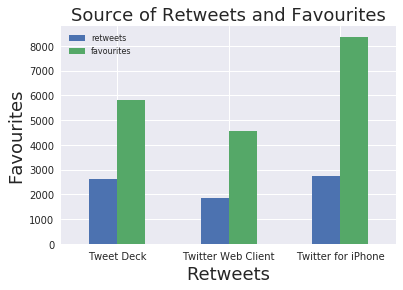

In [93]:
#plot a bar graph
fig = plt.figure(figsize=(10,10));
source.plot.bar(legend=True);
plt.xlabel('Retweets',fontsize=18);
plt.xticks(rotation=360) #rotate the tick
plt.ylabel('Favourites', fontsize=18);
plt.title('Source of Retweets and Favourites', fontsize=18)
plt.legend(fontsize=8)

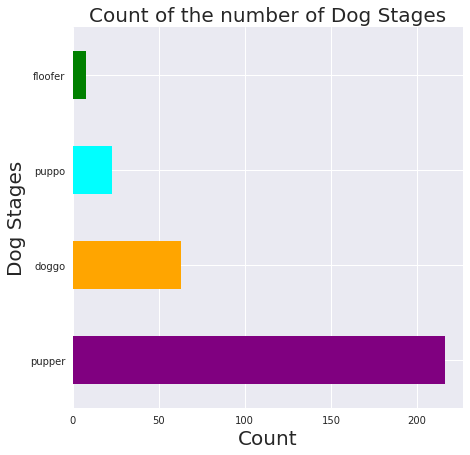

In [94]:
# subset the value_counts of the dog_stages to a pandas datafram 'dog_count'
dog_count= twitter.dog_stages.value_counts()
dog_count
#plot a horizontal bar of the dog count
fig = plt.figure(figsize=(7,7));
colour=['purple','orange','cyan','green']
labels=['pupper','doggo','puppo','floofer']
N=4
ind = np.arange(N)
ax = dog_count.plot(kind='barh', color=colour)
ax.set_xlabel('Count', fontsize=20);
ax.set_yticks(ind, labels)
ax.set_ylabel('Dog Stages', fontsize=20)
ax.set_title('Count of the number of Dog Stages', fontsize=20)
plt.show()

## Documentation
- To visualise the hist plot, I used the retweets and favourites column
- To visualise the source of retweet and favourites, I grouped by the source column and found the average
- To visualise the dog stages, I created a dataframe of the count of the dog stages and visualised using a horizontal bar plot

In [95]:
# Subset the p columns withe the count of their retweets and favourites
jpg_p1=twitter[['p1']].merge(twitter.groupby('p1')['retweets','favourites'].agg('count'), on='p1')
jpg_p2=twitter[['p2']].merge(twitter.groupby('p2')['retweets','favourites'].agg('count'), on='p2')
jpg_p3=twitter[['p3']].merge(twitter.groupby('p3')['retweets','favourites'].agg('count'), on='p3')

In [96]:
# check their value_counts
jpg_p1['p1'].value_counts()

golden retriever             139
Labrador retriever            95
Pembroke                      88
Chihuahua                     79
pug                           55
chow                          41
Samoyed                       40
Pomeranian                    38
toy poodle                    38
malamute                      29
cocker spaniel                27
French bulldog                26
Chesapeake Bay retriever      23
miniature pinscher            22
seat belt                     21
Siberian husky                20
German shepherd               20
web site                      19
Staffordshire bullterrier     19
Shetland sheepdog             18
teddy                         18
Maltese dog                   18
Eskimo dog                    18
Shih-Tzu                      17
Cardigan                      17
Rottweiler                    17
beagle                        17
kuvasz                        16
Italian greyhound             16
Lakeland terrier              16
          

Text(0.5,0.98,'Most common p1 dog type')

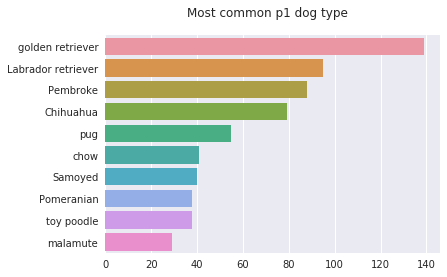

In [97]:
#plot a horizontal bar plot to show this visual
dog_type = jpg_p1['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common p1 dog type')

It can be observed that the p1 dog with the highest number of retweets and favourites is the 'Golden Retriever'

In [98]:
#check their value_counts
jpg_p2['p2'].value_counts()

Labrador retriever                96
golden retriever                  83
Cardigan                          72
Chihuahua                         43
French bulldog                    40
Chesapeake Bay retriever          40
Pomeranian                        39
toy poodle                        36
Siberian husky                    33
cocker spaniel                    32
miniature poodle                  32
beagle                            28
Eskimo dog                        27
collie                            26
Pembroke                          25
kuvasz                            25
Italian greyhound                 22
Pekinese                          21
malinois                          20
miniature pinscher                20
chow                              20
American Staffordshire terrier    20
Norwegian elkhound                19
toy terrier                       19
Samoyed                           19
Boston bull                       19
Staffordshire bullterrier         18
p

Text(0.5,0.98,'Most common p2 dog type')

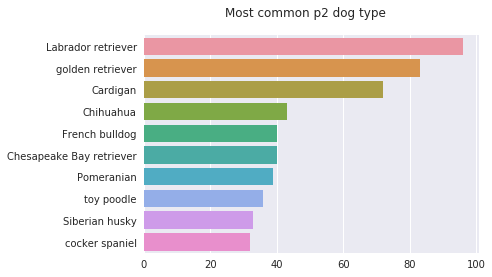

In [99]:
#plot a horizontal bar plot to show this visual
dog_type = jpg_p2['p2'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common p2 dog type')

It can be observed that the p2 dog with the highest number of retweets and favourites is the 'Labrador retriever'

In [100]:
#check their value_counts
jpg_p3['p3'].value_counts()

Labrador retriever                76
Chihuahua                         57
golden retriever                  46
Eskimo dog                        36
kelpie                            33
kuvasz                            31
chow                              31
Staffordshire bullterrier         30
beagle                            30
Pekinese                          29
cocker spaniel                    29
toy poodle                        29
Pomeranian                        27
Great Pyrenees                    26
Pembroke                          26
malamute                          25
French bulldog                    25
Chesapeake Bay retriever          24
American Staffordshire terrier    23
Cardigan                          23
pug                               21
basenji                           20
bull mastiff                      20
Siberian husky                    19
toy terrier                       18
Shetland sheepdog                 17
Boston bull                       17
L

Text(0.5,0.98,'Most common p3 dog type')

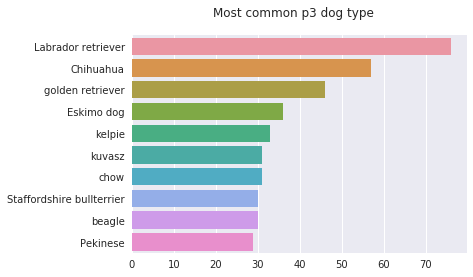

In [101]:
#plot a horizontal bar plot to show this visual
dog_type = jpg_p3['p3'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common p3 dog type')

It can be observed that the p3 dog with the highest number of retweets and favourites is the 'Labrador retriever'